In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [528]:
# this csv file has an evaluation of Sno and r-r values
df = pd.read_csv("/home/mohit/Documents/stethography vs r-r values/0-1000.csv")

In [529]:
df.head(1000)

,stethography,rrvalues
0,-1.4897,0.793
1,0.1815,0.796
2,1.3439,0.801
3,0.3860,0.850
4,-1.1263,0.857
...,...,...
994,-0.7706,0.806
995,-1.1761,0.803
996,0.3310,0.773
997,1.2402,0.776


In [530]:
df.describe()

,stethography,rrvalues
count,999.000000,999.000000
mean,0.077578,0.808598
std,0.998690,0.046056
min,-2.966700,0.666000
25%,-0.816850,0.778500
50%,0.053800,0.807000
75%,0.949550,0.837000
max,3.087300,0.983000


In [531]:
df.shape


(999, 2)

In [532]:
cdf = df[['stethography','rrvalues']]
cdf.head(5)

,stethography,rrvalues
0,-1.4897,0.793
1,0.1815,0.796
2,1.3439,0.801
3,0.3860,0.850
4,-1.1263,0.857


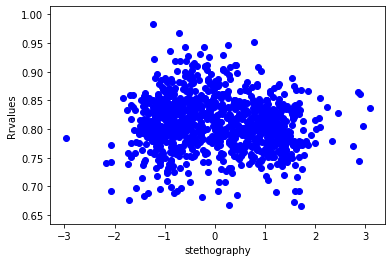

In [533]:
#graph of SNO vs r-r values

plt.scatter(cdf.stethography, cdf.rrvalues,color='blue')
plt.xlabel('stethography')
plt.ylabel('Rrvalues')
plt.show()

In [534]:
#splitting our data in 80-20 ratio for regression

In [535]:
#taking 20% test data 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

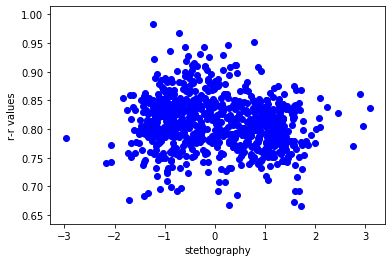

In [536]:
#plotting our training data of Sno vs r-r values
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.xlabel("stethography")
plt.ylabel("r-r values")
plt.show()

In [537]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00661566]]
Intercept:  [0.81047206]


Text(0, 0.5, 'r-r values')

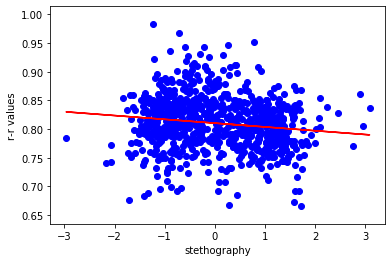

In [538]:
plt.scatter(train.stethography, train.rrvalues,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("stethography")
plt.ylabel("r-r values")

In [539]:
# checking accuracy of data by linear regression
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: -46.07


In [540]:
#using polynomial regression

In [541]:
#generating a matrix of all polynomial combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['stethography']])
train_y = np.asanyarray(train[['rrvalues']])

test_x = np.asanyarray(test[['stethography']])
test_y = np.asanyarray(test[['rrvalues']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.        ,  0.1815    ,  0.03294225],
       [ 1.        ,  0.386     ,  0.148996  ],
       [ 1.        ,  0.8781    ,  0.77105961],
       ...,
       [ 1.        , -0.7706    ,  0.59382436],
       [ 1.        , -1.1761    ,  1.38321121],
       [ 1.        ,  0.6561    ,  0.43046721]])

In [542]:
# training our ploynomial regression model
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         -0.00511812 -0.00579698]]
Intercept:  [0.81612507]


Text(0, 0.5, 'r-rvalues')

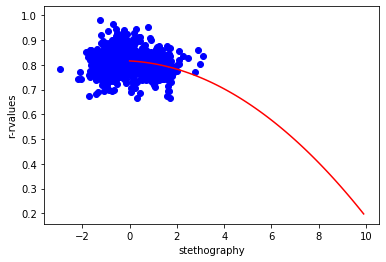

In [544]:
#plotting the polynomial regression
plt.scatter(train.stethography, train.rrvalues,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("stethography")
plt.ylabel("r-rvalues")

In [545]:
#getting the accuracy of our polynomial regression model
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -20.88
